# Required Packages, Modules and Utilities

In [1]:
# Modules
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Evaluation Metrics 
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay 
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay

%matplotlib inline

import warnings
warnings.simplefilter("ignore")

# Data Extraction

In [2]:
# Import csv file to DataFrame format
malware_data = pd.read_csv("ma_dataset.csv")

In [3]:
# Show first five rows
malware_data.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,172.217.2.101-10.42.0.151-443-59096-6,10.42.0.151,59096,172.217.2.101,443,6,18/06/2017 10:59:10,22213,1,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,10.42.0.151-31.13.71.3-60237-443-6,10.42.0.151,60237,31.13.71.3,443,6,18/06/2017 10:59:10,298571,6,7,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,172.217.0.234-10.42.0.151-443-37091-6,10.42.0.151,37091,172.217.0.234,443,6,18/06/2017 10:59:26,22294,1,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,10.42.0.151-54.85.219.72-48597-443-6,54.85.219.72,443,10.42.0.151,48597,6,18/06/2017 10:59:23,3959745,1,3,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,10.42.0.151-74.6.105.9-37494-443-6,10.42.0.151,37494,74.6.105.9,443,6,18/06/2017 10:59:33,340394,10,9,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [4]:
# Removal of leading and trailing whitespaces from column headings
# Replacement of spaces between words in column headings with underscore(s)
malware_data.columns = [column.strip().replace(' ', '_') for column in list(malware_data.columns)]

print(malware_data.columns)

Index(['Flow_ID', 'Source_IP', 'Source_Port', 'Destination_IP',
       'Destination_Port', 'Protocol', 'Timestamp', 'Flow_Duration',
       'Total_Fwd_Packets', 'Total_Backward_Packets',
       'Total_Length_of_Fwd_Packets', 'Total_Length_of_Bwd_Packets',
       'Fwd_Packet_Length_Max', 'Fwd_Packet_Length_Min',
       'Fwd_Packet_Length_Mean', 'Fwd_Packet_Length_Std',
       'Bwd_Packet_Length_Max', 'Bwd_Packet_Length_Min',
       'Bwd_Packet_Length_Mean', 'Bwd_Packet_Length_Std', 'Flow_Bytes/s',
       'Flow_Packets/s', 'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max',
       'Flow_IAT_Min', 'Fwd_IAT_Total', 'Fwd_IAT_Mean', 'Fwd_IAT_Std',
       'Fwd_IAT_Max', 'Fwd_IAT_Min', 'Bwd_IAT_Total', 'Bwd_IAT_Mean',
       'Bwd_IAT_Std', 'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Fwd_PSH_Flags',
       'Bwd_PSH_Flags', 'Fwd_URG_Flags', 'Bwd_URG_Flags', 'Fwd_Header_Length',
       'Bwd_Header_Length', 'Fwd_Packets/s', 'Bwd_Packets/s',
       'Min_Packet_Length', 'Max_Packet_Length', 'Packet_Length_Mean',
  

# Exploratory Data Analysis

In [5]:
# Get number of rows and columns
malware_data.shape

(24729, 85)

## Datatype and Range of Values of Columns

In [6]:
# Show the names and datatypes of columns
malware_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24729 entries, 0 to 24728
Data columns (total 85 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Flow_ID                      24729 non-null  object 
 1   Source_IP                    24729 non-null  object 
 2   Source_Port                  24729 non-null  int64  
 3   Destination_IP               24729 non-null  object 
 4   Destination_Port             24729 non-null  int64  
 5   Protocol                     24729 non-null  int64  
 6   Timestamp                    24729 non-null  object 
 7   Flow_Duration                24729 non-null  int64  
 8   Total_Fwd_Packets            24729 non-null  int64  
 9   Total_Backward_Packets       24729 non-null  int64  
 10  Total_Length_of_Fwd_Packets  24729 non-null  int64  
 11  Total_Length_of_Bwd_Packets  24729 non-null  float64
 12  Fwd_Packet_Length_Max        24729 non-null  int64  
 13  Fwd_Packet_Lengt

In [7]:
# Shows the mean, standard deviation, percentiles, minimum and maximum values of numerical data (datatype - float & int)
malware_data.describe()

,Source_Port,Destination_Port,Protocol,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,...,act_data_pkt_fwd,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
count,24729.000000,24729.000000,24729.000000,2.472900e+04,24729.000000,24729.000000,24729.000000,2.472900e+04,24729.000000,24729.000000,...,24729.000000,24729.000000,2.472900e+04,2.472900e+04,2.472900e+04,2.472900e+04,2.472900e+04,2.472900e+04,2.472900e+04,2.472900e+04
mean,38955.703951,5745.717942,8.293259,1.028840e+07,7.079097,9.296696,533.442962,9.900713e+03,210.051882,13.375066,...,1.203445,26.035100,1.502524e+05,2.501288e+04,1.728327e+05,1.318831e+05,3.723105e+06,2.819067e+05,3.964729e+06,3.509475e+06
std,18444.543420,15279.998418,4.514433,2.035457e+07,43.742094,110.080672,2401.576846,1.567220e+05,423.991591,72.145208,...,4.998793,6.720128,8.671138e+05,3.640135e+05,1.017055e+06,8.128204e+05,1.389364e+07,2.779641e+06,1.455277e+07,1.359477e+07
min,0.000000,0.000000,0.000000,2.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,-1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,34152.000000,80.000000,6.000000,5.105800e+04,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,44342.000000,80.000000,6.000000,5.518570e+05,2.000000,1.000000,31.000000,0.000000e+00,30.000000,0.000000,...,0.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,52363.000000,443.000000,6.000000,1.055015e+07,4.000000,3.000000,368.000000,2.220000e+02,244.000000,0.000000,...,1.000000,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,65481.000000,62155.000000,17.000000,1.199943e+08,2326.000000,6939.000000,207598.000000,1.010000e+07,13680.000000,1460.000000,...,231.000000,60.000000,2.610000e+07,3.210000e+07,4.880000e+07,2.020000e+07,1.190000e+08,5.920000e+07,1.190000e+08,1.190000e+08


In [8]:
# Label ranges
malware_data['Label'].value_counts()

SCAREWARE_ANDROIDSPY      5815
RANSOMWARE_WANNALOCKER    5292
BENIGN                    4969
ADWARE_GOOLIGAN           4462
SMSMALWARE_SMSSNIFFER     4191
Name: Label, dtype: int64

In [9]:
# Show the number of unique values for each column
for col in malware_data.columns:
        print(col, malware_data[col].nunique())

Flow_ID 13281
Source_IP 539
Source_Port 11451
Destination_IP 983
Destination_Port 2587
Protocol 3
Timestamp 3323
Flow_Duration 22692
Total_Fwd_Packets 228
Total_Backward_Packets 276
Total_Length_of_Fwd_Packets 2527
Total_Length_of_Bwd_Packets 3707
Fwd_Packet_Length_Max 1060
Fwd_Packet_Length_Min 79
Fwd_Packet_Length_Mean 3935
Fwd_Packet_Length_Std 4323
Bwd_Packet_Length_Max 674
Bwd_Packet_Length_Min 276
Bwd_Packet_Length_Mean 4055
Bwd_Packet_Length_Std 4081
Flow_Bytes/s 13182
Flow_Packets/s 22825
Flow_IAT_Mean 20991
Flow_IAT_Std 9671
Flow_IAT_Max 16842
Flow_IAT_Min 13876
Fwd_IAT_Total 11013
Fwd_IAT_Mean 13663
Fwd_IAT_Std 8973
Fwd_IAT_Max 11273
Fwd_IAT_Min 8974
Bwd_IAT_Total 5608
Bwd_IAT_Mean 7489
Bwd_IAT_Std 6145
Bwd_IAT_Max 5905
Bwd_IAT_Min 2232
Fwd_PSH_Flags 2
Bwd_PSH_Flags 1
Fwd_URG_Flags 1
Bwd_URG_Flags 1
Fwd_Header_Length 588
Bwd_Header_Length 582
Fwd_Packets/s 22856
Bwd_Packets/s 16809
Min_Packet_Length 50
Max_Packet_Length 907
Packet_Length_Mean 5239
Packet_Length_Std 5439
Packe

In [10]:
# Assign labels to a list
malware_labels = list(malware_data['Label'].unique())
malware_labels.remove('BENIGN')

# Show source ports with the maximum number of malware types

lab_source = malware_data.groupby(['Label', 'Source_Port']).agg({'Source_Port': 'count'})
lab_source.columns = ['Number']

for label in malware_labels:
    print(label)
    print(lab_source.loc[label, :].sort_values('Number', ascending=False)[:2], '\n\n')

ADWARE_GOOLIGAN
             Number
Source_Port        
443             216
80              171 


RANSOMWARE_WANNALOCKER
             Number
Source_Port        
80              302
443             238 


SCAREWARE_ANDROIDSPY
             Number
Source_Port        
80              460
443             266 


SMSMALWARE_SMSSNIFFER
             Number
Source_Port        
443             251
80              224 




In [11]:
# Show destination ports with the maximum number of malware types
lab_source = malware_data.groupby(['Label', 'Destination_Port']).agg({'Destination_Port': 'count'})
lab_source.columns = ['Number']

for label in malware_labels:
    print(label)
    print(lab_source.loc[label, :].sort_values('Number', ascending=False)[:2], '\n\n')

ADWARE_GOOLIGAN
                  Number
Destination_Port        
443                 1669
80                  1407 


RANSOMWARE_WANNALOCKER
                  Number
Destination_Port        
443                 2127
80                  1487 


SCAREWARE_ANDROIDSPY
                  Number
Destination_Port        
80                  2006
443                 1758 


SMSMALWARE_SMSSNIFFER
                  Number
Destination_Port        
443                 1795
80                   973 




## Visualizations

Protocol  Protocol_Name         
0         IPv6 Hop-by-Hop Option      100
17        UDP                        5210
6         TCP                       19419
dtype: int64


<Axes: xlabel='Protocol_Name', ylabel='count'>

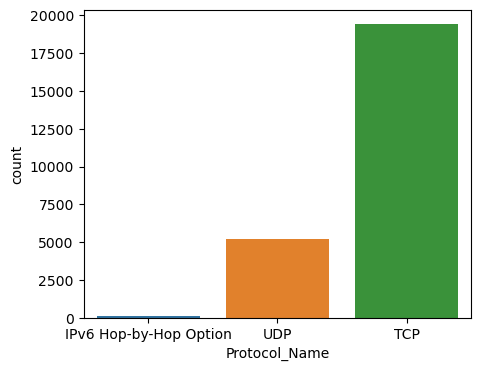

In [12]:
# Mapping of protocol numbers to corresponding names
protocol_name = malware_data['Protocol'].map(lambda a: 'IPv6 Hop-by-Hop Option' if a == 0 else 'TCP' if a == 6 else 'UDP')
malware_data['Protocol_Name'] = protocol_name

# Show protocol counts
print(malware_data[['Protocol', 'Protocol_Name']].value_counts().sort_values())

plt.figure(figsize=(5,4))
sns.countplot(data=malware_data, x='Protocol_Name', order=['IPv6 Hop-by-Hop Option', 'UDP', 'TCP'])

Protocol_Name           Label                 
IPv6 Hop-by-Hop Option  SCAREWARE_ANDROIDSPY        24
                        ADWARE_GOOLIGAN             23
                        RANSOMWARE_WANNALOCKER      20
                        SMSMALWARE_SMSSNIFFER       20
                        BENIGN                      13
TCP                     SCAREWARE_ANDROIDSPY      4467
                        RANSOMWARE_WANNALOCKER    4151
                        BENIGN                    4103
                        ADWARE_GOOLIGAN           3439
                        SMSMALWARE_SMSSNIFFER     3259
UDP                     SCAREWARE_ANDROIDSPY      1324
                        RANSOMWARE_WANNALOCKER    1121
                        ADWARE_GOOLIGAN           1000
                        SMSMALWARE_SMSSNIFFER      912
                        BENIGN                     853
Name: Label, dtype: int64


<Axes: xlabel='Protocol_Name', ylabel='count'>

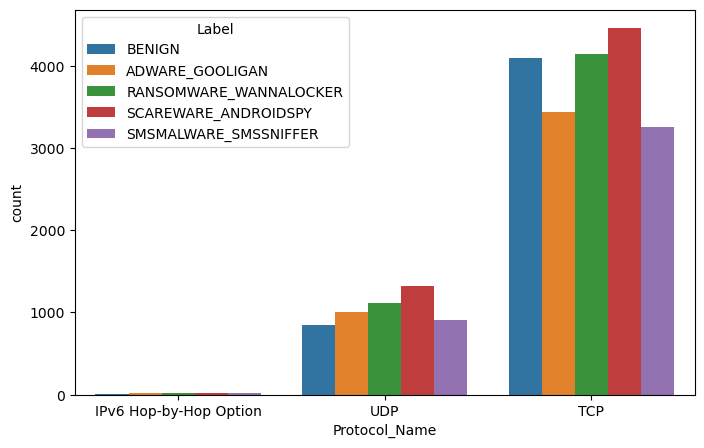

In [13]:
# Categorize labels by protocols
print(malware_data.groupby('Protocol_Name')['Label'].value_counts())

plt.figure(figsize=(8,5))
sns.countplot(data=malware_data, x='Protocol_Name', hue='Label', order=['IPv6 Hop-by-Hop Option', 'UDP', 'TCP'])

Protocol_Name
IPv6 Hop-by-Hop Option    9.291741e+07
TCP                       1.234745e+07
UDP                       1.027834e+06
Name: Flow_Duration, dtype: float64


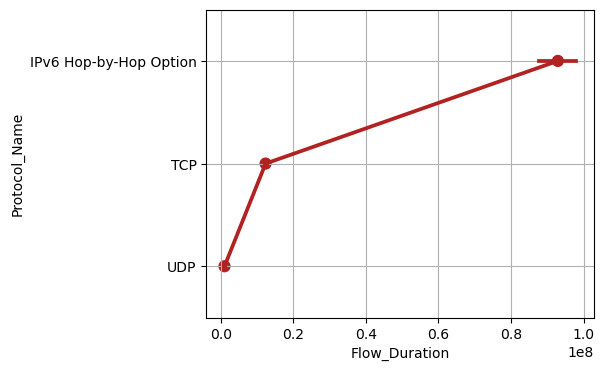

In [14]:
# Show mean Flow_Duration for each protocol for comparison
# Default error bar shows 95% confidence interval

print(malware_data.groupby('Protocol_Name')['Flow_Duration'].mean())

plt.figure(figsize=(5, 4))
sns.pointplot(data=malware_data, y='Protocol_Name', x='Flow_Duration', 
              order=['IPv6 Hop-by-Hop Option', 'TCP', 'UDP'], color='firebrick')
plt.grid()
plt.show()

Label
BENIGN                     42607.342303
SMSMALWARE_SMSSNIFFER      56981.275282
SCAREWARE_ANDROIDSPY       70308.946147
RANSOMWARE_WANNALOCKER     70558.103660
ADWARE_GOOLIGAN           150183.160358
Name: Flow_Bytes/s, dtype: float64


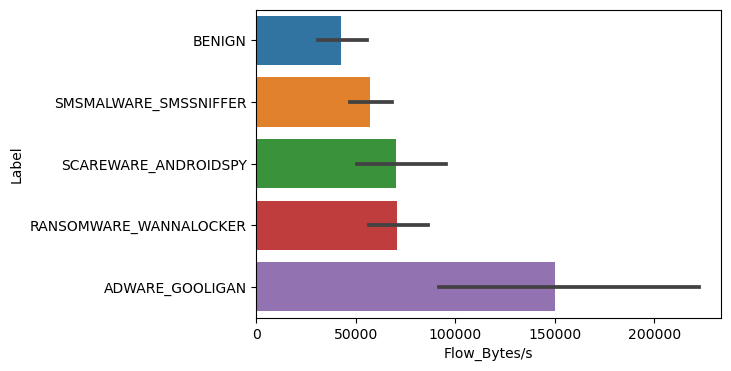

In [15]:
# Displays mean of Flow_Bytes/s per label.
# Lines show 95% confidence intervals for the mean
label_flowbyte = malware_data.groupby('Label')['Flow_Bytes/s'].mean().sort_values()
print(label_flowbyte)

plt.figure(figsize=(6,4))
sns.barplot(data=malware_data, x='Flow_Bytes/s', y='Label', order=label_flowbyte.index)

plt.show()

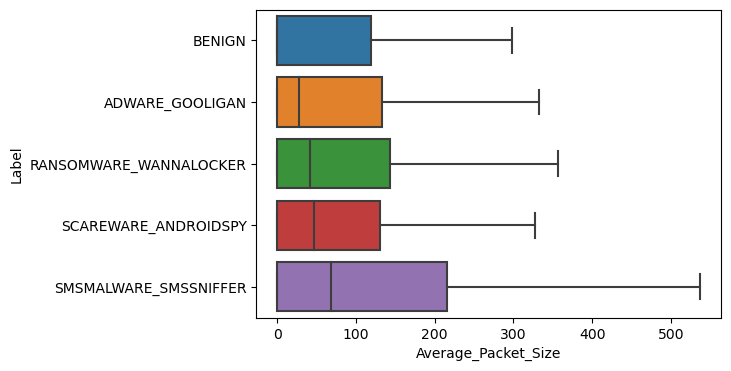

In [16]:
# Show the distribution of the average packet size with respect to the labels
plt.figure(figsize=(6,4))
sns.boxplot(data=malware_data, x='Average_Packet_Size', y='Label', sym="")

plt.show()

# Feature Engineering
### to select and transfrom relevant features

### Data Transformation for Binary Classification:
-  BENIGN = 0
-  Others = 1

In [17]:
# Mapping of BENIGN to 0, and others to 1
label_binary = malware_data['Label'].map(lambda a: 0 if a == 'BENIGN' else 1)
malware_data['Label_Binary'] = label_binary

print(malware_data['Label_Binary'].value_counts())
malware_data.head()

1    19760
0     4969
Name: Label_Binary, dtype: int64


,Flow_ID,Source_IP,Source_Port,Destination_IP,Destination_Port,Protocol,Timestamp,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Protocol_Name,Label_Binary
0,172.217.2.101-10.42.0.151-443-59096-6,10.42.0.151,59096,172.217.2.101,443,6,18/06/2017 10:59:10,22213,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,TCP,0
1,10.42.0.151-31.13.71.3-60237-443-6,10.42.0.151,60237,31.13.71.3,443,6,18/06/2017 10:59:10,298571,6,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,TCP,0
2,172.217.0.234-10.42.0.151-443-37091-6,10.42.0.151,37091,172.217.0.234,443,6,18/06/2017 10:59:26,22294,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,TCP,0
3,10.42.0.151-54.85.219.72-48597-443-6,54.85.219.72,443,10.42.0.151,48597,6,18/06/2017 10:59:23,3959745,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,TCP,0
4,10.42.0.151-74.6.105.9-37494-443-6,10.42.0.151,37494,74.6.105.9,443,6,18/06/2017 10:59:33,340394,10,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,TCP,0


Malware    19760
BENIGN      4969
Name: Label_Binary, dtype: int64


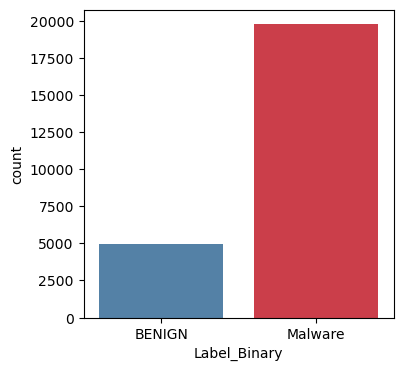

In [18]:
# Show Binary Classification Labels
bin_labels_count = malware_data['Label_Binary'].value_counts()
bin_labels_count.index = ['Malware', 'BENIGN']
print(bin_labels_count)

plt.figure(figsize=(4, 4))
sns.countplot(data=malware_data, x='Label_Binary', palette=['#4682b4', '#e32636'])
plt.xticks([0, 1], ['BENIGN', 'Malware'])
plt.show()

### Data Transformation for Multi-class Classification:
-  BENIGN = 0
-  ADWARE_GOOLIGAN = 1
-  RANSOMWARE_WANNALOCKER = 2
-  SCAREWARE_ANDROIDSPY = 3
-  SMSMALWARE_SMSSNIFFER = 4

In [19]:
# Mapping of all labels to unique numbers

def map_label(label):
    if label == 'ADWARE_GOOLIGAN':
        label_type = 1
    elif label == 'RANSOMWARE_WANNALOCKER':
        label_type = 2
    elif label == 'SCAREWARE_ANDROIDSPY':
        label_type = 3
    elif label == 'SMSMALWARE_SMSSNIFFER':
        label_type = 4
    else:
        label_type = 0
        
    return label_type

malware_data['Label_Multiple'] = malware_data['Label'].apply(map_label)

print(malware_data['Label_Multiple'].value_counts())
malware_data.head()

3    5815
2    5292
0    4969
1    4462
4    4191
Name: Label_Multiple, dtype: int64


,Flow_ID,Source_IP,Source_Port,Destination_IP,Destination_Port,Protocol,Timestamp,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,...,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Protocol_Name,Label_Binary,Label_Multiple
0,172.217.2.101-10.42.0.151-443-59096-6,10.42.0.151,59096,172.217.2.101,443,6,18/06/2017 10:59:10,22213,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,TCP,0,0
1,10.42.0.151-31.13.71.3-60237-443-6,10.42.0.151,60237,31.13.71.3,443,6,18/06/2017 10:59:10,298571,6,7,...,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,TCP,0,0
2,172.217.0.234-10.42.0.151-443-37091-6,10.42.0.151,37091,172.217.0.234,443,6,18/06/2017 10:59:26,22294,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,TCP,0,0
3,10.42.0.151-54.85.219.72-48597-443-6,54.85.219.72,443,10.42.0.151,48597,6,18/06/2017 10:59:23,3959745,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,TCP,0,0
4,10.42.0.151-74.6.105.9-37494-443-6,10.42.0.151,37494,74.6.105.9,443,6,18/06/2017 10:59:33,340394,10,9,...,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,TCP,0,0


SCAREWARE_ANDROIDSPY      5815
RANSOMWARE_WANNALOCKER    5292
BENIGN                    4969
ADWARE_GOOLIGAN           4462
SMSMALWARE_SMSSNIFFER     4191
Name: Label, dtype: int64


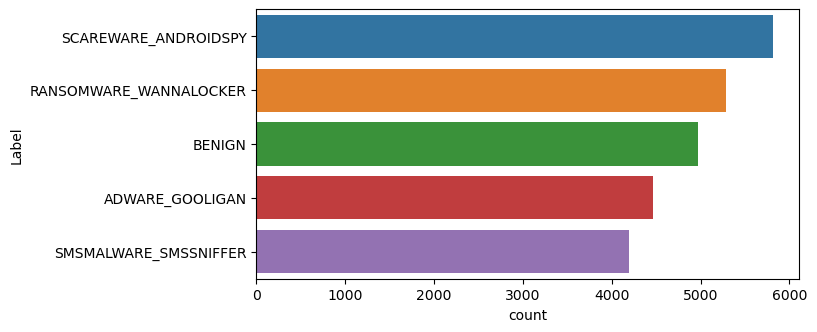

In [20]:
# Show Multi-class Classification Labels
print(malware_data['Label'].value_counts())

plt.figure(figsize=(7, 3.5))
sns.countplot(data=malware_data, y='Label', order=malware_data['Label'].value_counts().index)
plt.show()

### Encoding Categorical Features

In [21]:
# Categorical features to dummy variables
non_numeric_features = ['Source_IP', 'Destination_IP', 'Flow_ID', 'Timestamp']
malware_dummies = pd.get_dummies(malware_data[non_numeric_features])

# Drop target and categorical columns to get only numeric features
numeric_features = list(malware_data.columns.drop(['Source_IP', 'Destination_IP', 'Flow_ID', 'Timestamp',
                                                   'Protocol_Name', 'Label', 'Label_Binary', 'Label_Multiple']))

# Combine dummies and numeric features to get training data consisting of only features
training_set = malware_dummies.join(malware_data[numeric_features])

training_set.columns

Index(['Source_IP_0.0.0.0', 'Source_IP_10.42.0.1', 'Source_IP_10.42.0.151',
       'Source_IP_10.42.0.211', 'Source_IP_101.227.14.97',
       'Source_IP_101.251.204.125', 'Source_IP_101.251.204.126',
       'Source_IP_103.235.46.211', 'Source_IP_103.235.46.212',
       'Source_IP_103.235.46.39',
       ...
       'act_data_pkt_fwd', 'min_seg_size_forward', 'Active_Mean', 'Active_Std',
       'Active_Max', 'Active_Min', 'Idle_Mean', 'Idle_Std', 'Idle_Max',
       'Idle_Min'],
      dtype='object', length=18206)

# Model Fitting and Evaluation 

In [22]:
# Set seed for reproducibility
SEED = 21

# Instantiate models
models = [RandomForestClassifier(random_state=SEED),
          KNeighborsClassifier(),
          LinearSVC(random_state=SEED),
          LogisticRegression(random_state=SEED, max_iter=250)]

# Without Dimensionality Reduction

## Binary Classification

In [23]:
bin_y = malware_data['Label_Binary'].values

# Split data into 70% training set and 30% test set
# X: features; y: targets
bin_X_train, bin_X_test, bin_y_train, bin_y_test = train_test_split(training_set, bin_y, test_size=0.3, random_state=SEED)


The Metrics for RandomForestClassifier are: 

Accuracy: 0.886
Precision: 0.88
Recall: 0.992
F1_Score: 0.933
Specificity: 0.465
ROC_AUC: 0.729 


              precision    recall  f1-score   support

           0       0.94      0.46      0.62      1493
           1       0.88      0.99      0.93      5926

    accuracy                           0.89      7419
   macro avg       0.91      0.73      0.78      7419
weighted avg       0.89      0.89      0.87      7419

[[ 694  799]
 [  45 5881]]


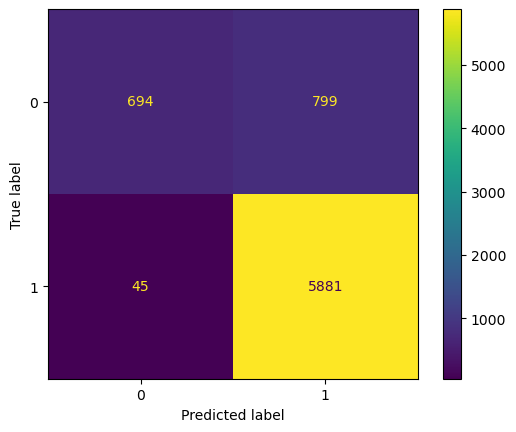

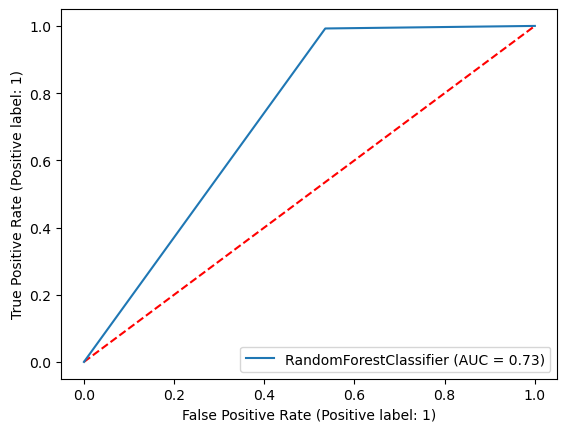


The Metrics for KNeighborsClassifier are: 

Accuracy: 0.801
Precision: 0.837
Recall: 0.933
F1_Score: 0.882
Specificity: 0.279
ROC_AUC: 0.606 


              precision    recall  f1-score   support

           0       0.51      0.28      0.36      1493
           1       0.84      0.93      0.88      5926

    accuracy                           0.80      7419
   macro avg       0.67      0.61      0.62      7419
weighted avg       0.77      0.80      0.78      7419

[[ 417 1076]
 [ 398 5528]]


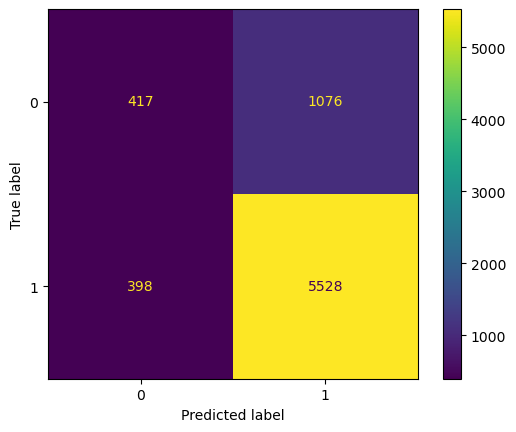

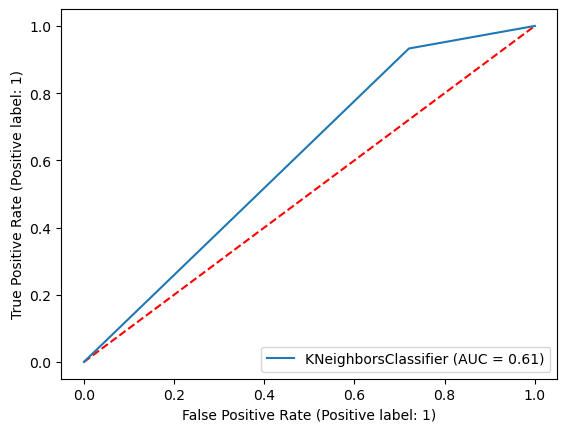


The Metrics for LinearSVC are: 

Accuracy: 0.601
Precision: 0.817
Recall: 0.646
F1_Score: 0.721
Specificity: 0.424
ROC_AUC: 0.535 


              precision    recall  f1-score   support

           0       0.23      0.42      0.30      1493
           1       0.82      0.65      0.72      5926

    accuracy                           0.60      7419
   macro avg       0.52      0.53      0.51      7419
weighted avg       0.70      0.60      0.64      7419

[[ 633  860]
 [2098 3828]]


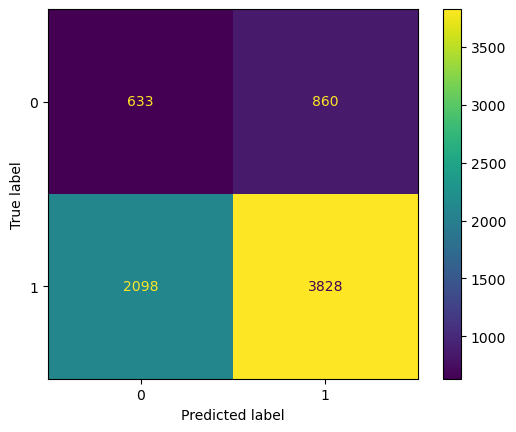

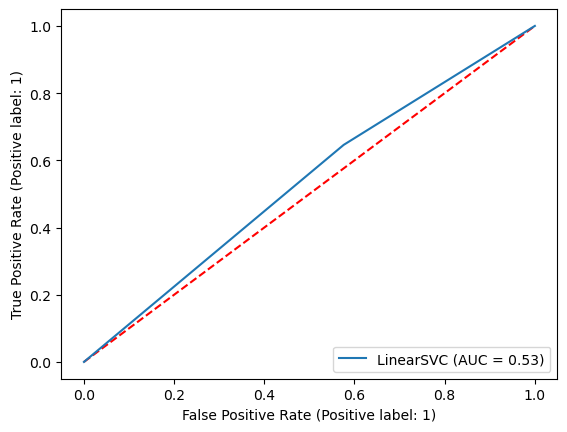


The Metrics for LogisticRegression are: 

Accuracy: 0.797
Precision: 0.799
Recall: 0.996
F1_Score: 0.887
Specificity: 0.007
ROC_AUC: 0.501 


              precision    recall  f1-score   support

           0       0.30      0.01      0.01      1493
           1       0.80      1.00      0.89      5926

    accuracy                           0.80      7419
   macro avg       0.55      0.50      0.45      7419
weighted avg       0.70      0.80      0.71      7419

[[  10 1483]
 [  23 5903]]


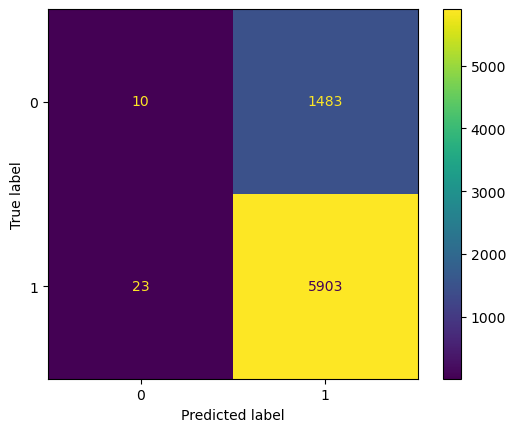

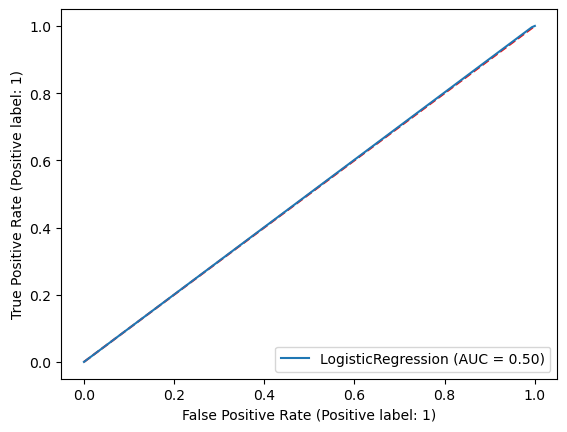

In [24]:
# Lists for evaluation metrics
bin_model = []
bin_accuracy = []
bin_precision = []
bin_recall = []          # Recall = Sensitivity = TPR
bin_f1 = []
bin_specificity = []     # Specificity = TNR
bin_roc_auc = []

for model in models:
    model_name = model.__class__.__name__
    
    model.fit(bin_X_train, bin_y_train)               # train the algorithm on the training data
    model_pred = model.predict(bin_X_test)            # predict labels

    cm = metrics.confusion_matrix(bin_y_test, model_pred, labels=model.classes_)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

    # Mapping of scorer name to scorer function
    # Round up values to 3 decimal places
    accuracy = np.round(accuracy_score(bin_y_test, model_pred), 3)
    precision = np.round(metrics.precision_score(bin_y_test, model_pred), 3)
    recall = np.round(metrics.recall_score(bin_y_test, model_pred), 3)
    f1_score = np.round(metrics.f1_score(bin_y_test, model_pred), 3)
    specificity = np.round(cm[0,0]/(cm[0,0]+cm[0,1]), 3)
    roc_auc = np.round(roc_auc_score(bin_y_test, model_pred), 3)

    # Append results to corresponding lists
    bin_model.append(model_name)
    bin_accuracy.append(accuracy)
    bin_precision.append(precision)
    bin_recall.append(recall)
    bin_f1.append(f1_score)
    bin_specificity.append(specificity)
    bin_roc_auc.append(roc_auc)

    print("\nThe Metrics for {} are: ".format(model_name))

    print('\nAccuracy: {}'.format(accuracy))
    print('Precision: {}'.format(precision))
    print('Recall: {}'.format(recall))
    print('F1_Score: {}'.format(f1_score))
    print('Specificity: {}'.format(specificity))
    print('ROC_AUC: {} \n\n'.format(roc_auc))

    print(classification_report(bin_y_test, model_pred))
    print(cm)
    cm_display.plot()
    plt.show()
    
    fig, ax = plt.subplots()
    ax.plot([0, 1], [0, 1], 'r--')
    RocCurveDisplay.from_predictions(bin_y_test, model_pred, name=str(model_name), ax=ax)
    plt.show()

    print("==========================================================================================================")

### Compilation of Binary Classification Results

In [25]:
# Show lists of results

print("Models: ", bin_model)
print("Accuracies: ", bin_accuracy)
print("Precision: ", bin_precision)
print("Recall/Sensitivity/TPR/: ", bin_recall)
print("F1_Score: ", bin_f1)
print("Specificity/TNR: ", bin_specificity)
print("ROC_AUC: ", bin_roc_auc)

Models:  ['RandomForestClassifier', 'KNeighborsClassifier', 'LinearSVC', 'LogisticRegression']
Accuracies:  [0.886, 0.801, 0.601, 0.797]
Precision:  [0.88, 0.837, 0.817, 0.799]
Recall/Sensitivity/TPR/:  [0.992, 0.933, 0.646, 0.996]
F1_Score:  [0.933, 0.882, 0.721, 0.887]
Specificity/TNR:  [0.465, 0.279, 0.424, 0.007]
ROC_AUC:  [0.729, 0.606, 0.535, 0.501]


In [26]:
# Convert lists to a single DataFrame

bin_dict_of_lists = {
    "Bin_Model": bin_model,
    "Bin_Accuracy": bin_accuracy,
    "Bin_Precision": bin_precision,
    "Bin_Recall/Sensitivity/TPR": bin_recall,
    "Bin_F1_Score": bin_f1,
    "Bin_Specificity/TNR": bin_specificity,
    "Bin_ROC_AUC": bin_roc_auc
}
bin_all_results = pd.DataFrame(bin_dict_of_lists)
bin_all_results

,Bin_Model,Bin_Accuracy,Bin_Precision,Bin_Recall/Sensitivity/TPR,Bin_F1_Score,Bin_Specificity/TNR,Bin_ROC_AUC
0,RandomForestClassifier,0.886,0.880,0.992,0.933,0.465,0.729
1,KNeighborsClassifier,0.801,0.837,0.933,0.882,0.279,0.606
2,LinearSVC,0.601,0.817,0.646,0.721,0.424,0.535
3,LogisticRegression,0.797,0.799,0.996,0.887,0.007,0.501


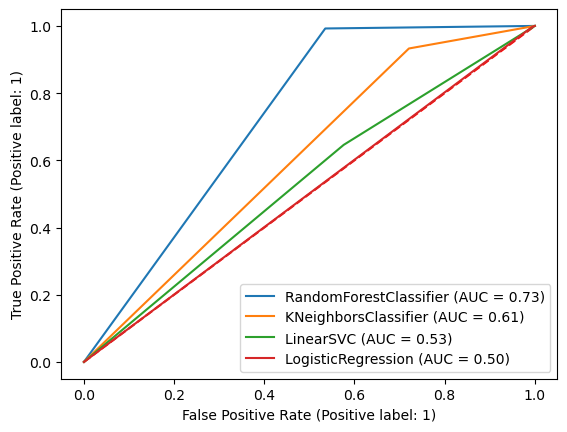

In [27]:
# Show all ROC_AUC curves in one chart

ax = plt.gca()
ax.plot([0, 1], [0, 1], 'r--')

for model in models:
    model_name = model.__class__.__name__
    
    model.fit(bin_X_train, bin_y_train)            
    model_pred = model.predict(bin_X_test)

    RocCurveDisplay.from_predictions(bin_y_test, model_pred, name=str(model_name), ax=ax)
    
plt.show()

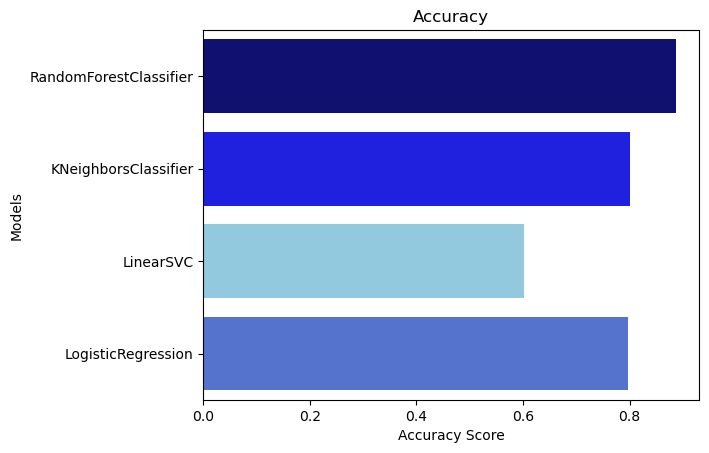

In [28]:
# Display accuracies
custom_palette = ["navy", "blue", "skyblue", "royalblue"]

sns.barplot(x=bin_accuracy, y=bin_model, palette=custom_palette)
plt.title("Accuracy")
plt.xlabel("Accuracy Score")
plt.ylabel("Models")
plt.show()

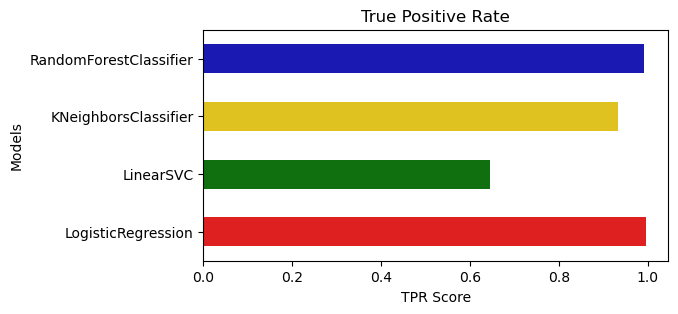

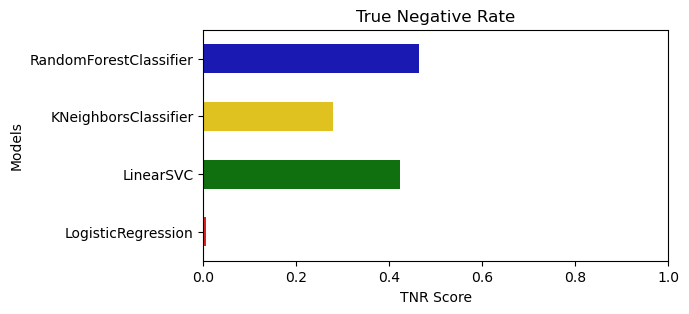

In [29]:
# Show TPR & TNR of all models
custom_palette = ["mediumblue", "gold", "green", "red"]

plt.figure(figsize=(6,3))
sns.barplot(x=bin_recall, y=bin_model, width=0.5, palette=custom_palette)
plt.title("True Positive Rate")
plt.xlabel("TPR Score")
plt.ylabel("Models")
plt.show()

plt.figure(figsize=(6,3))
sns.barplot(x=bin_specificity, y=bin_model, width=0.5, palette=custom_palette)
plt.title("True Negative Rate")
plt.xlabel("TNR Score")
plt.ylabel("Models")
plt.xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.show()

## Multi-class Classification

In [30]:
multi_y = malware_data['Label_Multiple'].values

# Split data into 70% training set and 30% test set
# X: features; y: targets
multi_X_train, multi_X_test, multi_y_train, multi_y_test = train_test_split(training_set, multi_y, test_size=0.3, 
                                                                            random_state=SEED)


The Metrics for RandomForestClassifier are: 

Accuracy: 0.713 

              precision    recall  f1-score   support

           0       0.67      0.68      0.68      1493
           1       0.68      0.56      0.62      1374
           2       0.66      0.71      0.68      1609
           3       0.63      0.66      0.64      1710
           4       0.99      1.00      0.99      1233

    accuracy                           0.71      7419
   macro avg       0.73      0.72      0.72      7419
weighted avg       0.71      0.71      0.71      7419

[[1011   89  175  218    0]
 [ 147  774  195  256    2]
 [ 136  126 1141  203    3]
 [ 206  147  218 1135    4]
 [   0    2    0    3 1228]]


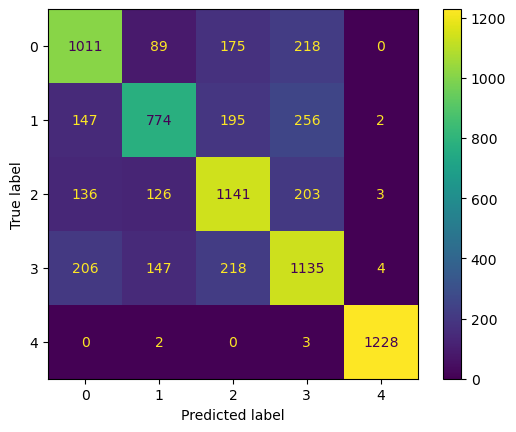


The Metrics for KNeighborsClassifier are: 

Accuracy: 0.394 

              precision    recall  f1-score   support

           0       0.38      0.47      0.42      1493
           1       0.34      0.33      0.34      1374
           2       0.39      0.41      0.40      1609
           3       0.39      0.34      0.36      1710
           4       0.51      0.43      0.47      1233

    accuracy                           0.39      7419
   macro avg       0.40      0.40      0.40      7419
weighted avg       0.40      0.39      0.39      7419

[[696 192 252 247 106]
 [272 460 252 256 134]
 [311 253 655 248 142]
 [375 292 336 583 124]
 [177 168 191 169 528]]


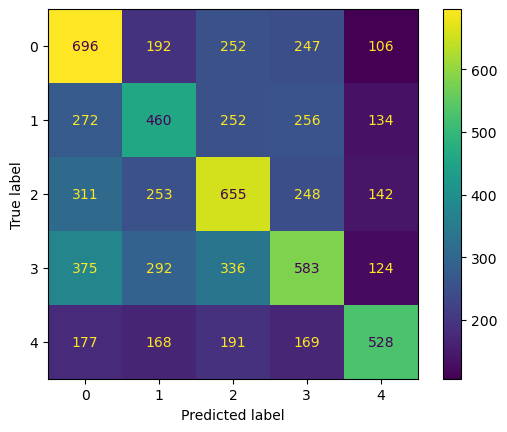


The Metrics for LinearSVC are: 

Accuracy: 0.216 

              precision    recall  f1-score   support

           0       0.22      0.50      0.30      1493
           1       0.16      0.10      0.13      1374
           2       0.21      0.21      0.21      1609
           3       0.21      0.10      0.13      1710
           4       0.29      0.16      0.21      1233

    accuracy                           0.22      7419
   macro avg       0.22      0.22      0.20      7419
weighted avg       0.22      0.22      0.20      7419

[[746 181 365 121  80]
 [739 144 246 107 138]
 [746 201 344 182 136]
 [801 188 425 169 127]
 [412 160 235 229 197]]


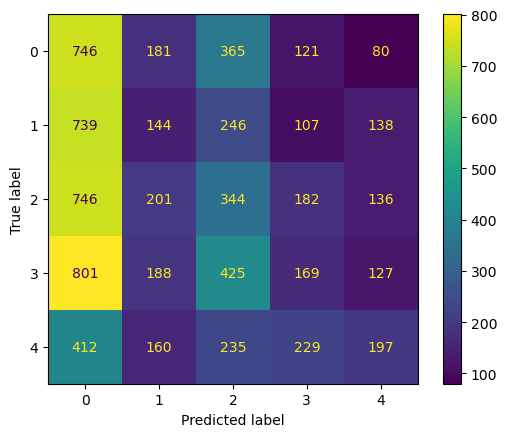


The Metrics for LogisticRegression are: 

Accuracy: 0.243 

              precision    recall  f1-score   support

           0       0.33      0.19      0.24      1493
           1       0.16      0.05      0.08      1374
           2       0.23      0.17      0.20      1609
           3       0.23      0.63      0.34      1710
           4       0.29      0.08      0.12      1233

    accuracy                           0.24      7419
   macro avg       0.25      0.22      0.20      7419
weighted avg       0.25      0.24      0.20      7419

[[ 281  102  190  892   28]
 [ 158   72  217  870   57]
 [ 192  105  274  957   81]
 [ 168  119  278 1079   66]
 [  61   51  212  812   97]]


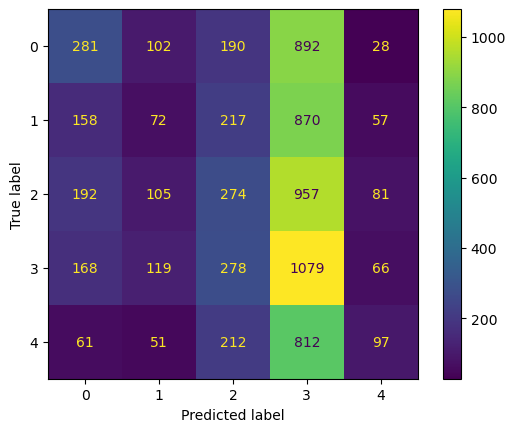

In [31]:
# Lists for evaluation metrics
multi_model = []
multi_accuracy = []

for model in models:
    model_name = model.__class__.__name__

    model.fit(multi_X_train, multi_y_train)                 # train the algorithm on the training data
    model_pred = model.predict(multi_X_test)                # predict labels

    cm = metrics.confusion_matrix(multi_y_test, model_pred, labels=model.classes_)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

    # Mapping of scorer name to scorer function
    accuracy = np.round(accuracy_score(multi_y_test, model_pred), 3)

    # Append results to corresponding lists
    multi_model.append(model_name)
    multi_accuracy.append(accuracy)

    print("\nThe Metrics for {} are: ".format(model_name))

    print('\nAccuracy: {} \n'.format(accuracy))

    print(classification_report(multi_y_test, model_pred))
    print(cm)
    cm_display.plot()
    plt.show()

    print("==========================================================================================================")

### Compilation of Multi-class Classification Results

In [32]:
# Convert lists to a single DataFrame
multi_dict_of_lists = {"Multi_Model": multi_model, "Multi_Accuracy": multi_accuracy}
multi_all_results = pd.DataFrame(multi_dict_of_lists)

multi_all_results

,Multi_Model,Multi_Accuracy
0,RandomForestClassifier,0.713
1,KNeighborsClassifier,0.394
2,LinearSVC,0.216
3,LogisticRegression,0.243


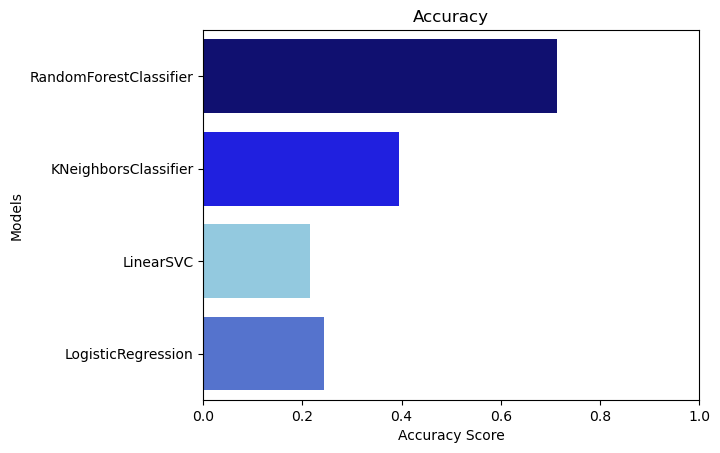

In [33]:
custom_palette = ["navy", "blue", "skyblue", "royalblue"]

sns.barplot(x=multi_accuracy, y=multi_model, palette=custom_palette)
plt.title("Accuracy")
plt.xlabel("Accuracy Score")
plt.ylabel("Models")
plt.xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.show()

# With Dimensionality Reduction

### Dimensionality Reduction with PCA

In [34]:
# Perform PCA without specifying the number of components
pca = PCA()

# Apply dimensionality reduction on training_set
transformed_data = pca.fit_transform(training_set)

In [35]:
# Print the shape of the transformed data
print("Shape of data after PCA:", transformed_data.shape)

Shape of data after PCA: (24729, 18206)


## Binary Classification

In [36]:
bin_y = malware_data['Label_Binary'].values

# Split data into 70% training set and 30% test set
# X: features; y: targets
bin_X_train, bin_X_test, bin_y_train, bin_y_test = train_test_split(transformed_data, bin_y, test_size=0.3, random_state=SEED)


The Metrics for RandomForestClassifier are: 

Accuracy: 0.913
Precision: 0.902
Recall: 1.0
F1_Score: 0.949
Specificity: 0.57
ROC_AUC: 0.785 


              precision    recall  f1-score   support

           0       1.00      0.57      0.73      1493
           1       0.90      1.00      0.95      5926

    accuracy                           0.91      7419
   macro avg       0.95      0.78      0.84      7419
weighted avg       0.92      0.91      0.90      7419

[[ 851  642]
 [   0 5926]]


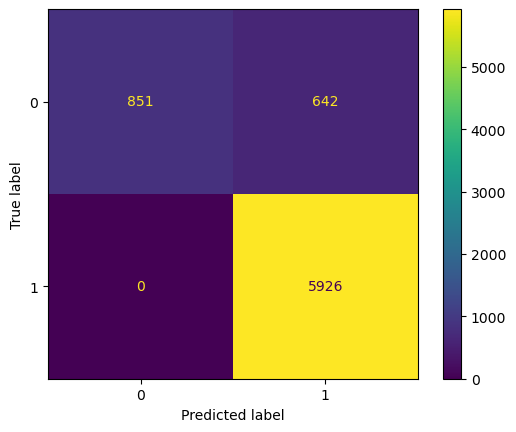

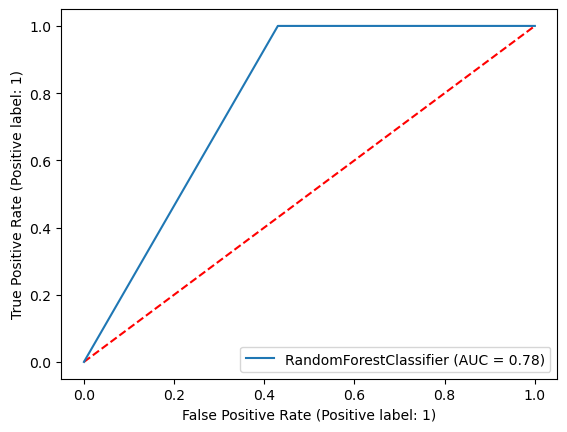


The Metrics for KNeighborsClassifier are: 

Accuracy: 0.801
Precision: 0.837
Recall: 0.933
F1_Score: 0.882
Specificity: 0.279
ROC_AUC: 0.606 


              precision    recall  f1-score   support

           0       0.51      0.28      0.36      1493
           1       0.84      0.93      0.88      5926

    accuracy                           0.80      7419
   macro avg       0.67      0.61      0.62      7419
weighted avg       0.77      0.80      0.78      7419

[[ 417 1076]
 [ 398 5528]]


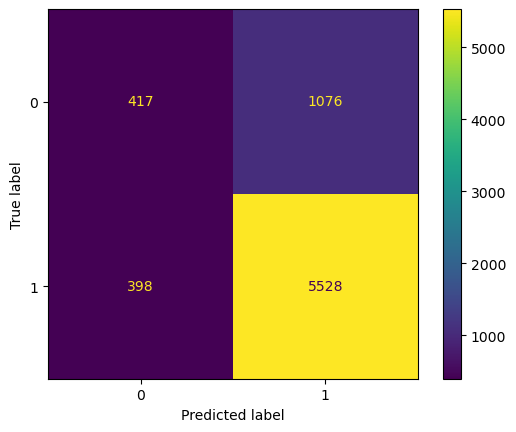

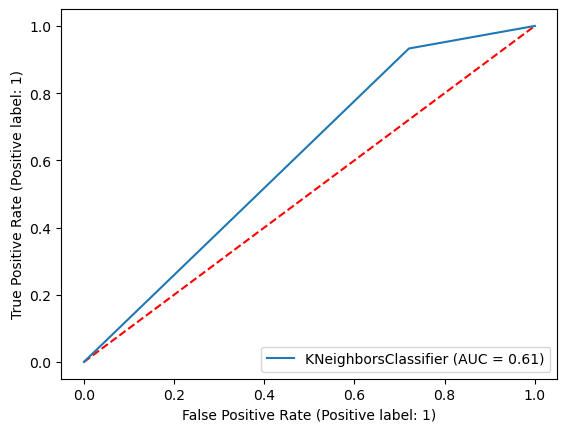


The Metrics for LinearSVC are: 

Accuracy: 0.748
Precision: 0.804
Recall: 0.905
F1_Score: 0.851
Specificity: 0.126
ROC_AUC: 0.515 


              precision    recall  f1-score   support

           0       0.25      0.13      0.17      1493
           1       0.80      0.90      0.85      5926

    accuracy                           0.75      7419
   macro avg       0.53      0.52      0.51      7419
weighted avg       0.69      0.75      0.71      7419

[[ 188 1305]
 [ 565 5361]]


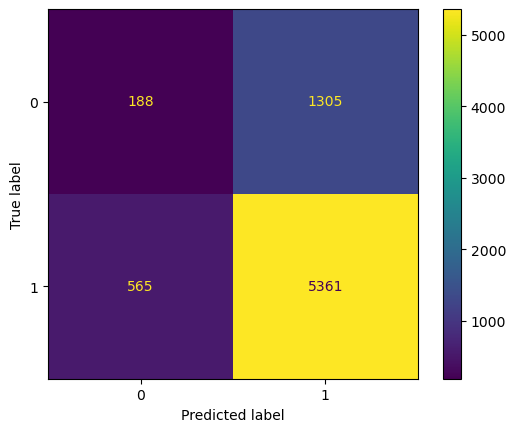

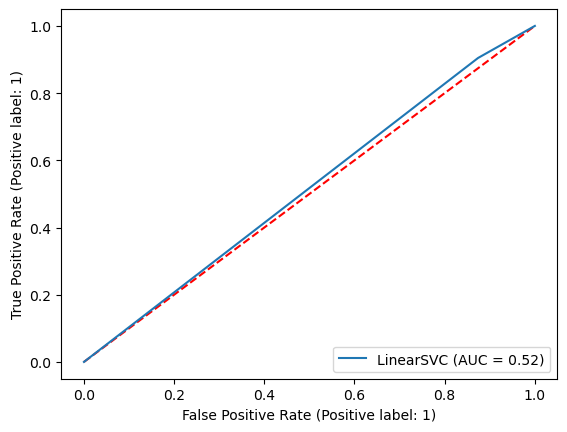


The Metrics for LogisticRegression are: 

Accuracy: 0.443
Precision: 0.854
Recall: 0.365
F1_Score: 0.511
Specificity: 0.752
ROC_AUC: 0.559 


              precision    recall  f1-score   support

           0       0.23      0.75      0.35      1493
           1       0.85      0.36      0.51      5926

    accuracy                           0.44      7419
   macro avg       0.54      0.56      0.43      7419
weighted avg       0.73      0.44      0.48      7419

[[1123  370]
 [3764 2162]]


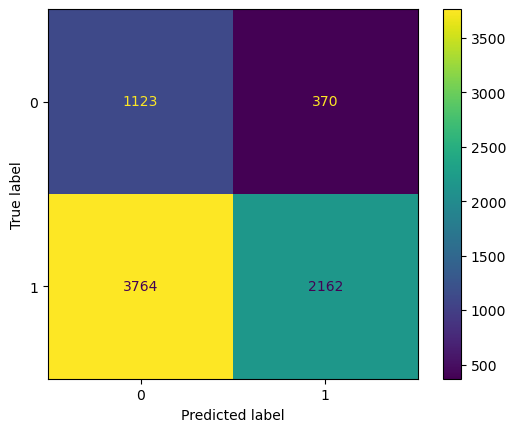

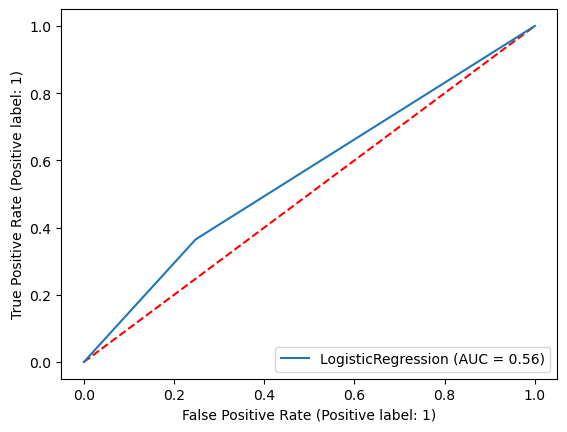

In [37]:
# Lists for evaluation metrics
bin_model_pca = []
bin_accuracy_pca = []
bin_precision_pca = []
bin_recall_pca = []          # Recall = Sensitivity = TPR
bin_f1_pca =  []
bin_specificity_pca = []     # Specificity = TNR
bin_roc_auc_pca = []

for model in models:
    model_name = model.__class__.__name__
    
    model.fit(bin_X_train, bin_y_train)               # train the algorithm on the training data
    model_pred = model.predict(bin_X_test)            # predict labels

    cm = metrics.confusion_matrix(bin_y_test, model_pred, labels=model.classes_)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

    # Mapping of scorer name to scorer function
    # Round up values to 3 decimal places
    accuracy = np.round(accuracy_score(bin_y_test, model_pred), 3)
    precision = np.round(metrics.precision_score(bin_y_test, model_pred), 3)
    recall = np.round(metrics.recall_score(bin_y_test, model_pred), 3)
    f1_score = np.round(metrics.f1_score(bin_y_test, model_pred), 3)
    specificity = np.round(cm[0,0]/(cm[0,0]+cm[0,1]), 3)
    roc_auc = np.round(roc_auc_score(bin_y_test, model_pred), 3)

    # Append results to corresponding lists
    bin_model_pca.append(model_name)
    bin_accuracy_pca.append(accuracy)
    bin_precision_pca.append(precision)
    bin_recall_pca.append(recall)
    bin_f1_pca.append(f1_score)
    bin_specificity_pca.append(specificity)
    bin_roc_auc_pca.append(roc_auc)

    print("\nThe Metrics for {} are: ".format(model_name))

    print('\nAccuracy: {}'.format(accuracy))
    print('Precision: {}'.format(precision))
    print('Recall: {}'.format(recall))
    print('F1_Score: {}'.format(f1_score))
    print('Specificity: {}'.format(specificity))
    print('ROC_AUC: {} \n\n'.format(roc_auc))

    print(classification_report(bin_y_test, model_pred))
    print(cm)
    cm_display.plot()
    plt.show()
    
    fig, ax = plt.subplots()
    ax.plot([0, 1], [0, 1], 'r--')
    RocCurveDisplay.from_predictions(bin_y_test, model_pred, name=str(model_name), ax=ax)
    plt.show()

    print("==========================================================================================================")

### Compilation of Binary Classification Results

In [38]:
# Show lists of results

print("Models: ", bin_model_pca)
print("Accuracies: ", bin_accuracy_pca)
print("Precision: ", bin_precision_pca)
print("Recall/Sensitivity/TPR/: ", bin_recall_pca)
print("F1_Score: ", bin_f1_pca)
print("Specificity/TNR: ", bin_specificity_pca)
print("ROC_AUC: ", bin_roc_auc_pca)

Models:  ['RandomForestClassifier', 'KNeighborsClassifier', 'LinearSVC', 'LogisticRegression']
Accuracies:  [0.913, 0.801, 0.748, 0.443]
Precision:  [0.902, 0.837, 0.804, 0.854]
Recall/Sensitivity/TPR/:  [1.0, 0.933, 0.905, 0.365]
F1_Score:  [0.949, 0.882, 0.851, 0.511]
Specificity/TNR:  [0.57, 0.279, 0.126, 0.752]
ROC_AUC:  [0.785, 0.606, 0.515, 0.559]


In [39]:
# Convert lists to a single DataFrame

bin_dict_of_lists_pca = {
    "Bin_Model": bin_model_pca,
    "Bin_Accuracy": bin_accuracy_pca,
    "Bin_Precision": bin_precision_pca,
    "Bin_Recall/Sensitivity/TPR": bin_recall_pca,
    "Bin_F1_Score": bin_f1_pca,
    "Bin_Specificity/TNR": bin_specificity_pca,
    "Bin_ROC_AUC": bin_roc_auc_pca
}
bin_all_results_pca = pd.DataFrame(bin_dict_of_lists_pca)
bin_all_results_pca

,Bin_Model,Bin_Accuracy,Bin_Precision,Bin_Recall/Sensitivity/TPR,Bin_F1_Score,Bin_Specificity/TNR,Bin_ROC_AUC
0,RandomForestClassifier,0.913,0.902,1.000,0.949,0.570,0.785
1,KNeighborsClassifier,0.801,0.837,0.933,0.882,0.279,0.606
2,LinearSVC,0.748,0.804,0.905,0.851,0.126,0.515
3,LogisticRegression,0.443,0.854,0.365,0.511,0.752,0.559


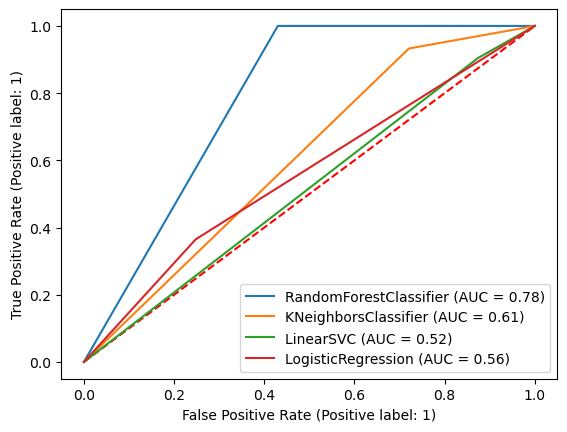

In [40]:
# Show all ROC_AUC curves in one chart

ax = plt.gca()
ax.plot([0, 1], [0, 1], 'r--')

for model in models:
    model_name = model.__class__.__name__
    
    model.fit(bin_X_train, bin_y_train)            
    model_pred = model.predict(bin_X_test)

    RocCurveDisplay.from_predictions(bin_y_test, model_pred, name=str(model_name), ax=ax)
    
plt.show()

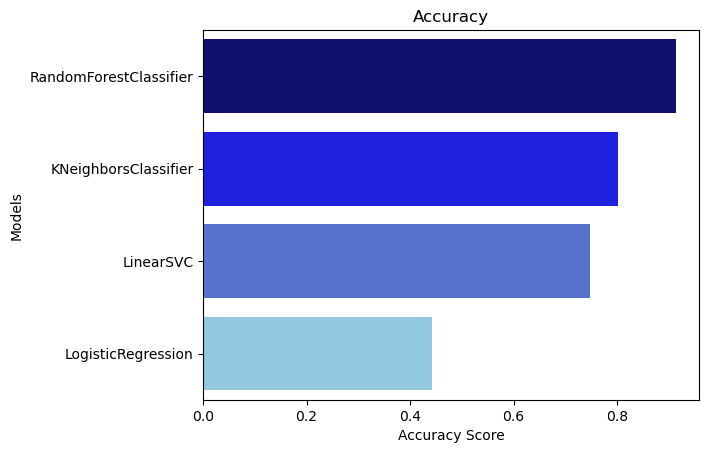

In [41]:
# Display accuracies
custom_palette = ["navy", "blue", "royalblue", "skyblue"]

sns.barplot(x=bin_accuracy_pca, y=bin_model_pca, palette=custom_palette)
plt.title("Accuracy")
plt.xlabel("Accuracy Score")
plt.ylabel("Models")
plt.show()

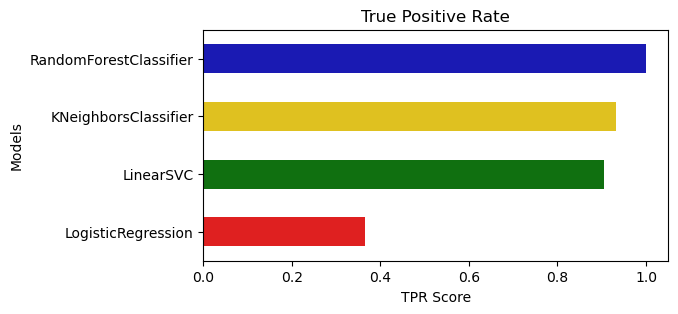

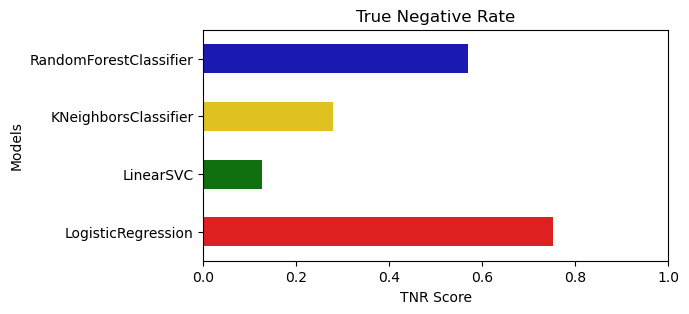

In [42]:
# Show TPR & TNR of all models
custom_palette = ["mediumblue", "gold", "green", "red"]

plt.figure(figsize=(6,3))
sns.barplot(x=bin_recall_pca, y=bin_model_pca, width=0.5, palette=custom_palette)
plt.title("True Positive Rate")
plt.xlabel("TPR Score")
plt.ylabel("Models")
plt.show()

plt.figure(figsize=(6,3))
sns.barplot(x=bin_specificity_pca, y=bin_model_pca, width=0.5, palette=custom_palette)
plt.title("True Negative Rate")
plt.xlabel("TNR Score")
plt.ylabel("Models")
plt.xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.show()

## Multi-class Classification

In [43]:
multi_y = malware_data['Label_Multiple'].values

# Split data into 70% training set and 30% test set
# X: features; y: targets
multi_X_train, multi_X_test, multi_y_train, multi_y_test = train_test_split(transformed_data, multi_y, test_size=0.3, 
                                                                            random_state=SEED)


The Metrics for RandomForestClassifier are: 

Accuracy: 0.872 

              precision    recall  f1-score   support

           0       0.92      0.84      0.88      1493
           1       0.89      0.77      0.82      1374
           2       0.84      0.87      0.85      1609
           3       0.78      0.90      0.84      1710
           4       0.99      0.99      0.99      1233

    accuracy                           0.87      7419
   macro avg       0.88      0.87      0.88      7419
weighted avg       0.88      0.87      0.87      7419

[[1258   45   72  116    2]
 [  50 1052   98  172    2]
 [  24   40 1396  141    8]
 [  40   41   89 1539    1]
 [   0    2    5    5 1221]]


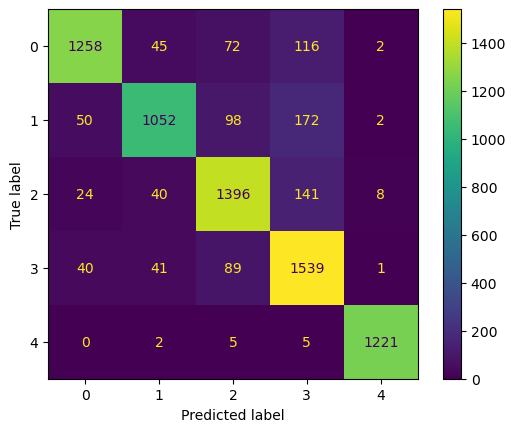


The Metrics for KNeighborsClassifier are: 

Accuracy: 0.394 

              precision    recall  f1-score   support

           0       0.38      0.47      0.42      1493
           1       0.34      0.33      0.34      1374
           2       0.39      0.41      0.40      1609
           3       0.39      0.34      0.36      1710
           4       0.51      0.43      0.47      1233

    accuracy                           0.39      7419
   macro avg       0.40      0.40      0.40      7419
weighted avg       0.40      0.39      0.39      7419

[[696 192 252 247 106]
 [272 460 252 256 134]
 [311 253 655 248 142]
 [375 292 336 583 124]
 [177 168 191 169 528]]


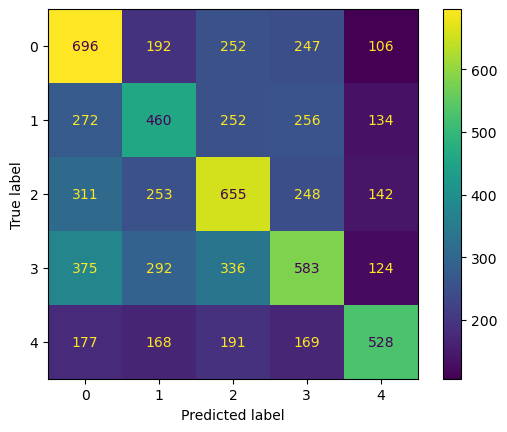


The Metrics for LinearSVC are: 

Accuracy: 0.234 

              precision    recall  f1-score   support

           0       0.27      0.04      0.06      1493
           1       0.16      0.03      0.05      1374
           2       0.25      0.11      0.15      1609
           3       0.23      0.83      0.36      1710
           4       0.27      0.03      0.06      1233

    accuracy                           0.23      7419
   macro avg       0.24      0.21      0.14      7419
weighted avg       0.24      0.23      0.15      7419

[[  53   66   71 1287   16]
 [  29   44  120 1148   33]
 [  36   65  169 1311   28]
 [  48   71  132 1426   33]
 [  31   22  176  963   41]]


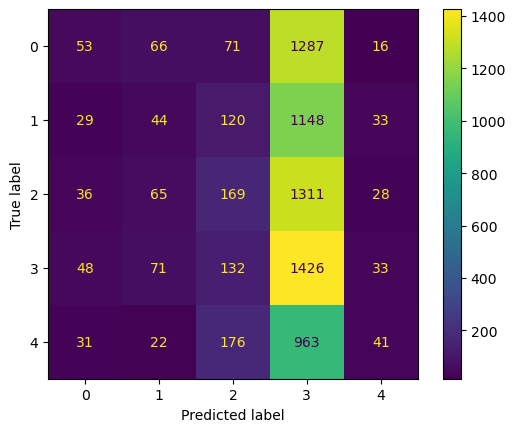


The Metrics for LogisticRegression are: 

Accuracy: 0.231 

              precision    recall  f1-score   support

           0       0.28      0.28      0.28      1493
           1       0.21      0.03      0.05      1374
           2       0.25      0.29      0.26      1609
           3       0.33      0.04      0.06      1710
           4       0.20      0.60      0.30      1233

    accuracy                           0.23      7419
   macro avg       0.25      0.25      0.19      7419
weighted avg       0.26      0.23      0.19      7419

[[417  26 357  33 660]
 [299  35 324  26 690]
 [321  44 459  39 746]
 [311  37 432  60 870]
 [150  21 300  22 740]]


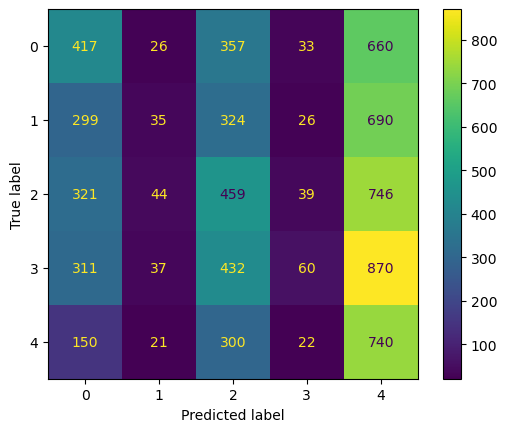

In [44]:
# Lists for evaluation metrics
multi_model_pca = []
multi_accuracy_pca = []

for model in models:
    model_name = model.__class__.__name__

    model.fit(multi_X_train, multi_y_train)                 # train the algorithm on the training data
    model_pred = model.predict(multi_X_test)                # predict labels

    cm = metrics.confusion_matrix(multi_y_test, model_pred, labels=model.classes_)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

    # Mapping of scorer name to scorer function
    accuracy = np.round(accuracy_score(multi_y_test, model_pred), 3)

    # Append results to corresponding lists
    multi_model_pca.append(model_name)
    multi_accuracy_pca.append(accuracy)

    print("\nThe Metrics for {} are: ".format(model_name))

    print('\nAccuracy: {} \n'.format(accuracy))

    print(classification_report(multi_y_test, model_pred))
    print(cm)
    cm_display.plot()
    plt.show()

    print("==========================================================================================================")

### Compilation of Multi-class Classification Results

In [45]:
# Convert lists to a single DataFrame
multi_dict_of_lists_pca = {"Multi_Model": multi_model_pca, "Multi_Accuracy": multi_accuracy_pca}
multi_all_results_pca = pd.DataFrame(multi_dict_of_lists_pca)

multi_all_results_pca

,Multi_Model,Multi_Accuracy
0,RandomForestClassifier,0.872
1,KNeighborsClassifier,0.394
2,LinearSVC,0.234
3,LogisticRegression,0.231


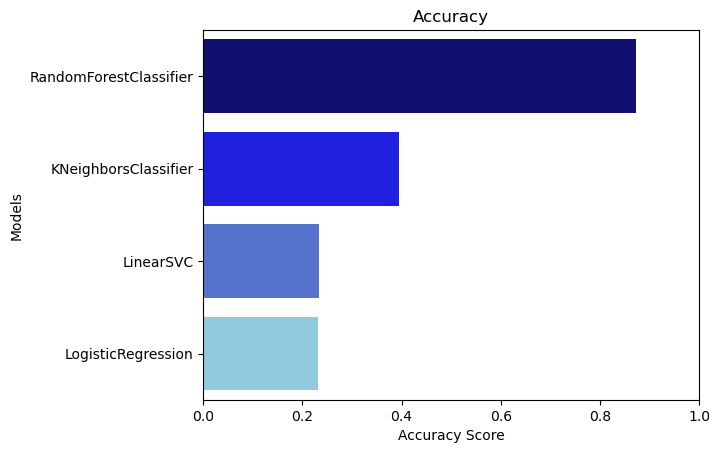

In [46]:
custom_palette = ["navy", "blue", "royalblue", "skyblue"]

sns.barplot(x=multi_accuracy_pca, y=multi_model_pca, palette=custom_palette)
plt.title("Accuracy")
plt.xlabel("Accuracy Score")
plt.ylabel("Models")
plt.xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.show()

# Compilation of all Results

## Without PCA
### Comparison of Accuracies for Binary and Multi-class Classification

In [47]:
bin_and_multi_lists = {
    "Bin_Model": bin_model,
    "Bin_Accuracy": bin_accuracy,
    "Multi_Accuracy": multi_accuracy,
}
all_accuracies = pd.DataFrame(bin_and_multi_lists)
all_accuracies

,Bin_Model,Bin_Accuracy,Multi_Accuracy
0,RandomForestClassifier,0.886,0.713
1,KNeighborsClassifier,0.801,0.394
2,LinearSVC,0.601,0.216
3,LogisticRegression,0.797,0.243


In [48]:
all_accuracies_no_pca = all_accuracies.melt(id_vars=["Bin_Model"],
                                          value_vars=['Bin_Accuracy','Multi_Accuracy'],
                                          var_name=['Accuracy_Type'], value_name='value')
all_accuracies_no_pca 

,Bin_Model,Accuracy_Type,value
0,RandomForestClassifier,Bin_Accuracy,0.886
1,KNeighborsClassifier,Bin_Accuracy,0.801
2,LinearSVC,Bin_Accuracy,0.601
3,LogisticRegression,Bin_Accuracy,0.797
4,RandomForestClassifier,Multi_Accuracy,0.713
5,KNeighborsClassifier,Multi_Accuracy,0.394
6,LinearSVC,Multi_Accuracy,0.216
7,LogisticRegression,Multi_Accuracy,0.243


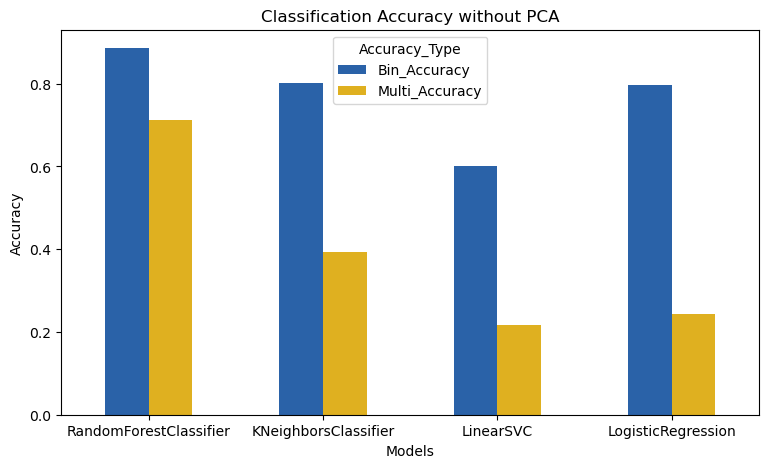

In [49]:
ca_palette1 = ['#1560bd', '#FFC000']

fig = plt.subplots(figsize =(9, 5))

sns.barplot(data=all_accuracies_no_pca, x='Bin_Model', y='value', hue='Accuracy_Type', width=0.5, palette=ca_palette1)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Classification Accuracy without PCA")

plt.show()

## With PCA
### Comparison of Accuracies for Binary and Multi-class Classification

In [50]:
bin_and_multi_lists_pca = {
    "Bin_Model_pca": bin_model_pca,
    "Bin_Accuracy_pca": bin_accuracy_pca,
    "Multi_Accuracy_pca": multi_accuracy_pca,
}
all_accuracies_pca = pd.DataFrame(bin_and_multi_lists_pca)
all_accuracies_pca

,Bin_Model_pca,Bin_Accuracy_pca,Multi_Accuracy_pca
0,RandomForestClassifier,0.913,0.872
1,KNeighborsClassifier,0.801,0.394
2,LinearSVC,0.748,0.234
3,LogisticRegression,0.443,0.231


In [51]:
all_accuracies_pca = all_accuracies_pca.melt(id_vars=["Bin_Model_pca"],
                                          value_vars=['Bin_Accuracy_pca','Multi_Accuracy_pca'],
                                          var_name=['Accuracy_Type'], value_name='value')
all_accuracies_pca

,Bin_Model_pca,Accuracy_Type,value
0,RandomForestClassifier,Bin_Accuracy_pca,0.913
1,KNeighborsClassifier,Bin_Accuracy_pca,0.801
2,LinearSVC,Bin_Accuracy_pca,0.748
3,LogisticRegression,Bin_Accuracy_pca,0.443
4,RandomForestClassifier,Multi_Accuracy_pca,0.872
5,KNeighborsClassifier,Multi_Accuracy_pca,0.394
6,LinearSVC,Multi_Accuracy_pca,0.234
7,LogisticRegression,Multi_Accuracy_pca,0.231


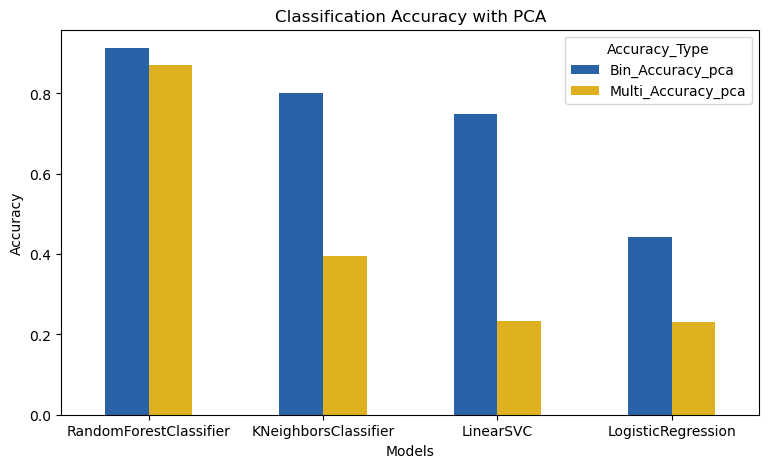

In [52]:
fig = plt.subplots(figsize =(9, 5))

sns.barplot(data=all_accuracies_pca, x='Bin_Model_pca', y='value', hue='Accuracy_Type', width=0.5, palette=ca_palette1)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Classification Accuracy with PCA")

plt.show()

## With and Without PCA

### Comparison of Accuracies for Binary Classification

In [53]:
bin_acc_lists = {
    "Bin_Model": bin_model,
    "Bin_Accuracy_no_pca": bin_accuracy,
    "Bin_Accuracy_pca": bin_accuracy_pca,
}
all_accuracies_bin = pd.DataFrame(bin_acc_lists)
all_accuracies_bin

,Bin_Model,Bin_Accuracy_no_pca,Bin_Accuracy_pca
0,RandomForestClassifier,0.886,0.913
1,KNeighborsClassifier,0.801,0.801
2,LinearSVC,0.601,0.748
3,LogisticRegression,0.797,0.443


In [54]:
all_accuracies_bin = all_accuracies_bin.melt(id_vars=["Bin_Model"],
                                          value_vars=['Bin_Accuracy_no_pca','Bin_Accuracy_pca'],
                                          var_name=['Accuracy_Type'], value_name='value')
all_accuracies_bin

,Bin_Model,Accuracy_Type,value
0,RandomForestClassifier,Bin_Accuracy_no_pca,0.886
1,KNeighborsClassifier,Bin_Accuracy_no_pca,0.801
2,LinearSVC,Bin_Accuracy_no_pca,0.601
3,LogisticRegression,Bin_Accuracy_no_pca,0.797
4,RandomForestClassifier,Bin_Accuracy_pca,0.913
5,KNeighborsClassifier,Bin_Accuracy_pca,0.801
6,LinearSVC,Bin_Accuracy_pca,0.748
7,LogisticRegression,Bin_Accuracy_pca,0.443


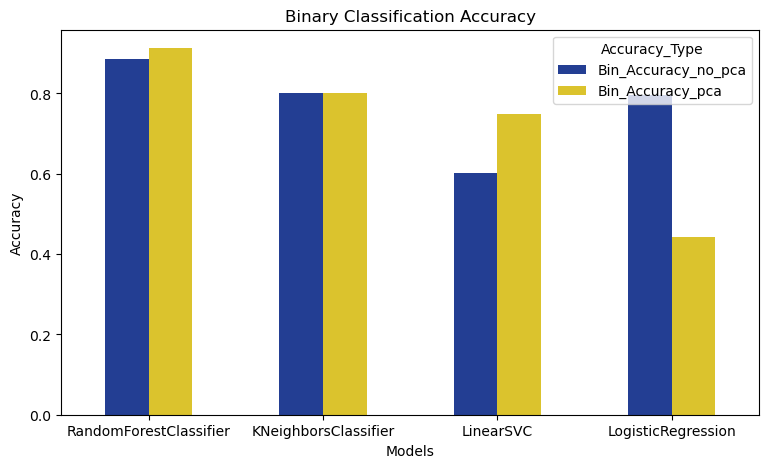

In [55]:
ca_palette2 = ['#1034A6', '#F8D810']

fig = plt.subplots(figsize =(9, 5))

sns.barplot(data=all_accuracies_bin, x='Bin_Model', y='value', hue='Accuracy_Type', width=0.5, palette=ca_palette2)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Binary Classification Accuracy")

plt.show()

### Comparison of Accuracies for Multi-class Classification

In [56]:
multi_acc_lists = {
    "Multi_Model": multi_model,
    "Multi_Accuracy_no_pca": multi_accuracy,
    "Multi_Accuracy_pca": multi_accuracy_pca,
}
all_accuracies_multi = pd.DataFrame(multi_acc_lists)
all_accuracies_multi

,Multi_Model,Multi_Accuracy_no_pca,Multi_Accuracy_pca
0,RandomForestClassifier,0.713,0.872
1,KNeighborsClassifier,0.394,0.394
2,LinearSVC,0.216,0.234
3,LogisticRegression,0.243,0.231


In [57]:
all_accuracies_multi = all_accuracies_multi.melt(id_vars=["Multi_Model"],
                                          value_vars=['Multi_Accuracy_no_pca','Multi_Accuracy_pca'],
                                          var_name=['Accuracy_Type'], value_name='value')
all_accuracies_multi

,Multi_Model,Accuracy_Type,value
0,RandomForestClassifier,Multi_Accuracy_no_pca,0.713
1,KNeighborsClassifier,Multi_Accuracy_no_pca,0.394
2,LinearSVC,Multi_Accuracy_no_pca,0.216
3,LogisticRegression,Multi_Accuracy_no_pca,0.243
4,RandomForestClassifier,Multi_Accuracy_pca,0.872
5,KNeighborsClassifier,Multi_Accuracy_pca,0.394
6,LinearSVC,Multi_Accuracy_pca,0.234
7,LogisticRegression,Multi_Accuracy_pca,0.231


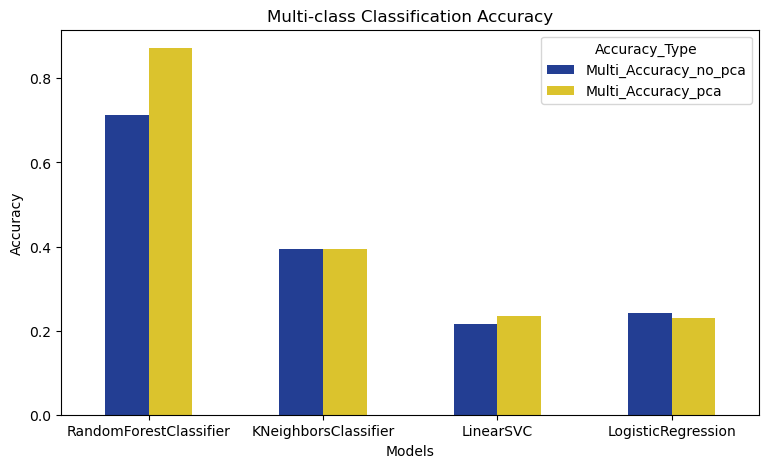

In [58]:
fig = plt.subplots(figsize =(9, 5))

sns.barplot(data=all_accuracies_multi, x='Multi_Model', y='value', hue='Accuracy_Type', width=0.5, palette=ca_palette2)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Multi-class Classification Accuracy")

plt.show()